In [ ]:
#requests 라이브러리로 요청하고, BeautifulSoup 라이브러리로 필요한 정보만 추출
pip install requests

In [ ]:
#BeautifulSoup : HTML 정보 수집
pip install bs4 #beautifulsoup4

# 스크래핑 테스트
[고용24 직업소개](https://www.work.go.kr/consltJobCarpa/srch/jobInfoSrch/summaryExmpl.do?jobNm=012301&selectId=)
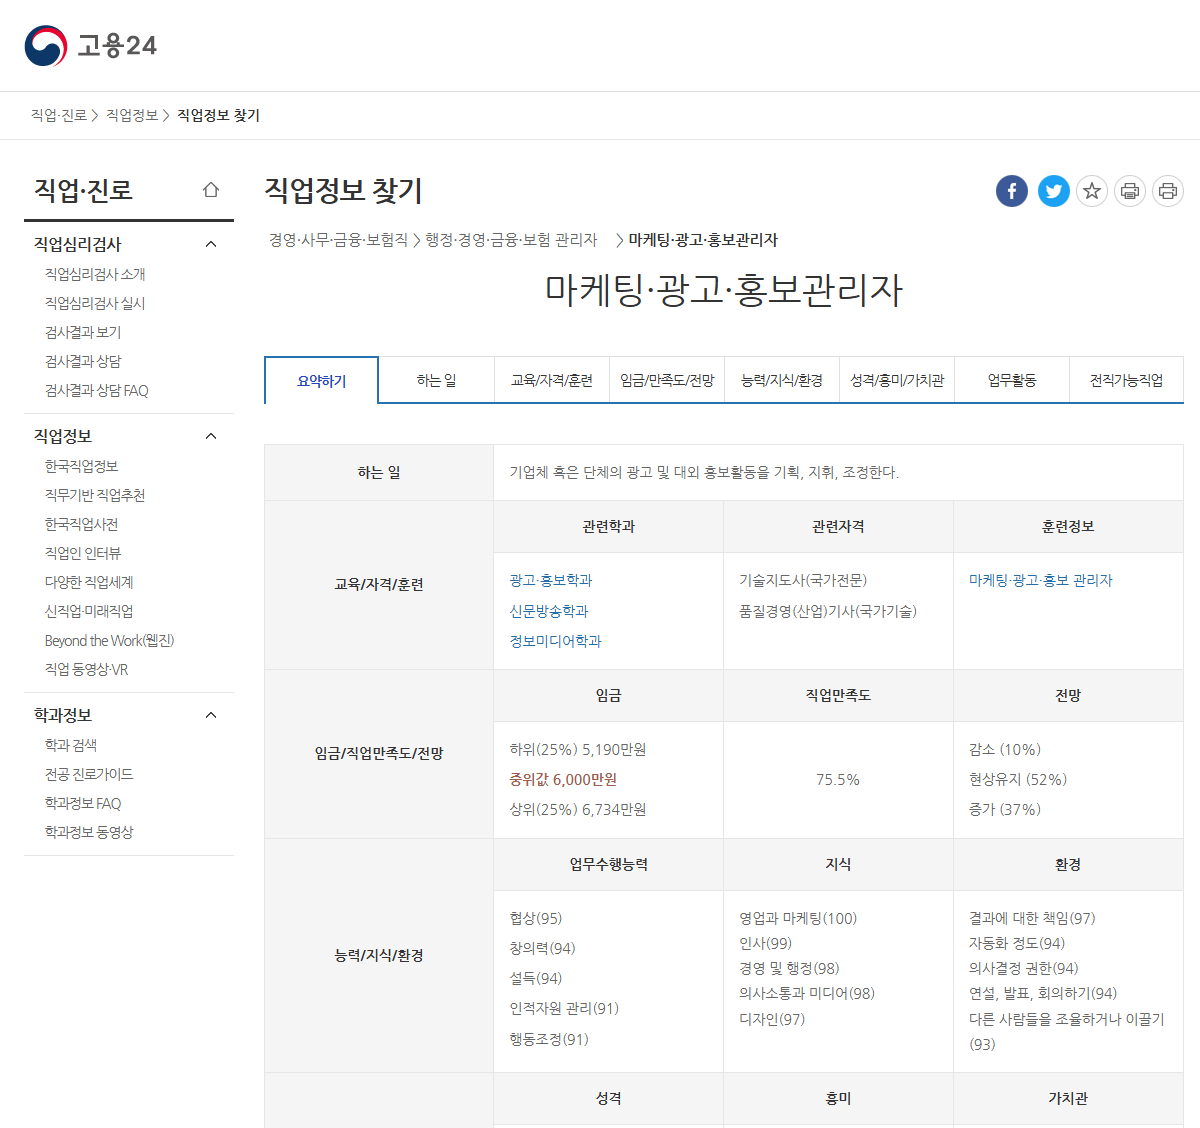

In [ ]:
import requests
from bs4 import BeautifulSoup

# 페이지 URL
url = "https://www.work.go.kr/consltJobCarpa/srch/jobInfoSrch/summaryExmpl.do?jobNm=012301&selectId="
response = requests.get(url)

# 페이지 파싱
soup = BeautifulSoup(response.text, 'html.parser')

# 필요한 정보 추출 (예시 - 실제 클래스명, 태그 등은 HTML 구조에 맞게 수정 필요)
job = soup.find("div", {"class": "tit-job"}).text  # 직업명
work = soup.select_one('#contents > div.data-table.job-detail.mb40 > table > tbody > tr:nth-child(1) > td') #직업이 하는 일
related_majors = soup.select_one('#contents > div.data-table.job-detail.mb40 > table > tbody > tr:nth-child(3) > td:nth-child(1) > ul') #관련학과
outlook = soup.select_one('#contents > div.data-table.job-detail.mb40 > table > tbody > tr:nth-child(5) > td:nth-child(3) > ul') #전망

print("직업:", job)
print("직업이 하는 일:", work)
print("관련 학과:", related_majors)
print("전망:", outlook)


직업: 마케팅·광고·홍보관리자
직업이 하는 일: <td colspan="4">기업체 혹은 단체의 광고 및 대외 홍보활동을 기획, 지휘, 조정한다.</td>
관련 학과: <ul class="basic-list">
<li class="font-blue2">
<a class="font-blue2" href="/consltJobCarpa/srch/schdpt/schdptSrchDtl.do?empCurtState1Id=2&amp;empCurtState2Id=5" target="_blank">
											광고·홍보학과
										</a>
</li>
<li class="font-blue2">
<a class="font-blue2" href="/consltJobCarpa/srch/schdpt/schdptSrchDtl.do?empCurtState1Id=2&amp;empCurtState2Id=16" target="_blank">
											신문방송학과
										</a>
</li>
<li class="font-blue2">
<a class="font-blue2" href="/consltJobCarpa/srch/schdpt/schdptSrchDtl.do?empCurtState1Id=2&amp;empCurtState2Id=17" target="_blank">
											정보미디어학과
										</a>
</li>
<!--
-->
</ul>
전망: <ul class="basic-list">
<li>감소 (10%)</li>
<li>현상유지 (52%)</li>
<li>증가 (37%)</li>
</ul>


# 직업별 화면 스크래핑 진행
1. 직업 코드 리스트 생성
2. 모든 직업 코드에 대해 웹 스크래핑 진행
3. 스크래핑한 데이터를 all_data에 저장

In [ ]:
import requests
from bs4 import BeautifulSoup

# 직업 코드 리스트
job_codes = [
    "029902", "029903", "029904", "031101", "031102", "031201", "031301", "031302", "031401", "031501",
    "032101", "032201", "032301", "032302", "032401", "032501", "033201", "033202", "011102", "011201",
    "012101", "012201", "012301", "012401", "012402", "013101", "013201", "013202", "013203", "013204",
    "013305", "013401", "013501", "013601", "013701", "014103", "014201", "014301", "015101", "015201",
    "016101", "016201", "016301", "021001", "022103", "022201", "022202", "023101", "023201", "023301",
    "023401", "024101", "024203", "024301", "024402", "024404", "025101", "025201", "025301", "025401",
    "025402", "026101", "026102", "026103", "026201", "026301", "026401", "027101", "027201", "028101",
    "028201", "028202", "028203", "028204", "028301", "028302", "028401", "028402", "029101", "029201",
    "029202", "029303", "029401", "029501", "029901", "110101", "110102", "110103", "110104", "110105",
    "110201", "110202", "110203", "121101", "121102", "121103", "121104", "121105", "121106", "121201",
    "122101", "122102", "122103", "122104", "122105", "122106", "122201", "122301", "131101", "131201",
    "131202", "131203", "132002", "132004", "133101", "133201", "133202", "133204", "133205", "133301",
    "133302", "133901", "134101", "134102", "134201", "134301", "134302", "134303", "134401", "135001",
    "136001", "136002", "140101", "140201", "140204", "140205", "140206", "140207", "140301", "140304",
    "140305", "140306", "140401", "140501", "140502", "140503", "140601", "140602", "140701", "151101",
    "151102", "151105", "151107", "151108", "151201", "151301", "152101", "152201", "153101", "153102",
    "153103", "153104", "153105", "153106", "153201", "153202", "153203", "153204", "153301", "154101",
    "154102", "154103", "154104", "154105", "154201", "155102", "155103", "155106", "155203", "155301",
    "155302", "155303", "155304", "155305", "155306", "155401", "155501", "156101", "156201", "157101",
    "157201", "158201", "158401", "158402", "158501", "159103", "159104", "214201", "214301", "214401",
    "214501", "215105", "221101", "221102", "221201", "221301", "221401", "222001", "231101", "231201",
    "231301", "231401", "231501", "232101", "232901", "240101", "240102", "240201", "240301", "250201",
    "250301", "211101", "211201", "212101", "212201", "212301", "212901", "213001", "214101", "214102",
    "301101", "301102", "301103", "301104", "301105", "301106", "301107", "301108", "301109", "301110",
    "301111", "301112", "301113", "301201", "301301", "301401", "302001", "303001", "303002", "304003",
    "304004", "305001", "306101", "306201", "306301", "306401", "306501", "306502", "306601", "306701",
    "306901", "306902", "306903", "306904", "307101", "307301", "307401", "307501", "307601", "411102",
    "411103", "411104", "411201", "411202", "411301", "412001", "412002", "412003", "413101", "413102",
    "413201", "413202", "414101", "414102", "414201", "414301", "414303", "414401", "414501", "414502",
    "414503", "414601", "414602", "414701", "414702", "414703", "415101", "415201", "415202", "415301",
    "415404", "415501", "415502", "415503", "415504", "416101", "416102", "416103", "416104", "416105",
    "416201", "416202", "416203", "416204", "416205", "416301", "416302", "416401", "416501", "416601",
    "416701", "417102", "417201", "420101", "420201", "420202", "420301", "420401", "420402", "420403",
    "531201", "531301", "531401", "531501", "531601", "531701", "532101", "532201", "532301", "532401",
    "541101", "541201", "541301", "542001", "550101", "550201", "561101", "561201", "561301", "561501",
    "561601", "562101", "562301", "562401", "511101", "511201", "511301", "511302", "511401", "511402",
    "511501", "511502", "512102", "512201", "512301", "521101", "521201", "521303", "521304", "522101",
    "522201", "522202", "523001", "524001", "531101", "611001", "612101", "612201", "612301", "612401",
    "612501", "613001", "614001", "615101", "615203", "615301", "615401", "615501", "615601", "615701",
    "616101", "616201", "617101", "621101", "621102", "621201", "621203", "621301", "621401", "621402",
    "621403", "621901", "622101", "622201", "622304", "623001", "623002", "624101", "624201", "624301",
    "624401", "701101", "701201", "701301", "701401", "701501", "701601", "701602", "701701", "702101",
    "702201", "702301", "702401", "702501", "702502", "702601", "702701", "703101", "703201", "704001",
    "705101", "705201", "705901", "705902", "706001", "811101", "811201", "811301", "811401", "811501",
    "811601", "811901", "812101", "812102", "812201", "812301", "812401", "812901", "812902", "813101",
    "813201", "814001", "815001", "816103", "817101", "817201", "817301", "821101", "821201", "822101",
    "822301", "823101", "823301", "824101", "825101", "825201", "826101", "826201", "826301", "826401",
    "831101", "831201", "831301", "832101", "832201", "833001", "834001", "835101", "835201", "836001",
    "841101", "841201", "842101", "842201", "842301", "851101", "851201", "852101", "852201", "852301",
    "852401", "853101", "853201", "861101", "861201", "862101", "863101", "864101", "864201", "865101",
    "866101", "871101", "871201", "871202", "872101", "873101", "873201", "873202", "873203", "874101",
    "874201", "874301", "874401", "874501", "874502", "874503", "874601", "874701", "875101", "875201",
    "875301", "875401", "876101", "876201", "876301", "876401", "877101", "877201", "877301", "877401",
    "877501", "877601", "877701", "877801", "877901", "878101", "878201", "878301", "878401", "878501",
    "878601", "878701", "879101", "879201", "879301", "879401", "879501", "879601", "879701", "879801",
    "880101", "880201", "880301", "880401", "880501", "880601", "880701", "880801", "880901", "881101",
    "881201", "881301", "881401", "881501", "881601", "881701", "881801", "881901", "882101", "882201",
    "882301", "882401", "882501", "882601", "882701", "882801", "882901", "883101", "883201", "883301",
    "883401", "883501", "883601", "883701", "883801", "883901", "884101", "884201", "884301", "884401",
    "884501", "884601", "884701", "884801", "884901", "885101", "885201", "885301", "885401", "885501",
    "885601", "885701", "885801", "885901", "886101", "886201", "886301", "886401", "886501", "886601",
    "886701", "886801", "886901", "887101", "887201", "887301", "887401", "887501", "887601", "887701",
    "887801", "887901", "888101", "888201", "888301", "888401", "888501", "888601", "888701", "888801",
    "888901", "889101", "889201", "889301", "889401", "889501", "889601", "889701", "889801", "889901",
    "890101", "890201", "890301", "890401", "890501", "890601", "890701", "890801", "890901", "891101",
    "891201", "891301", "891401", "891501", "891601", "891701", "891801", "891901", "892101", "892201",
    "892301", "892401", "892501", "892601", "892701", "892801", "892901", "893101", "893201", "893301",
    "893401", "893501", "893601", "893701", "893801", "893901", "894101", "894201", "894301", "894401",
    "894501", "894601", "894701", "894801", "894901", "895101", "895201", "895301", "895401", "895501",
    "895601", "895701", "895801", "895901", "896101", "896201", "896301", "896401", "896501", "896601",
    "896701", "896801", "896901", "897101", "897201", "897301", "897401", "897501", "897601", "897701",
    "897801", "897901", "898101", "898201", "898301", "898401", "898501", "898601", "898701", "898801",
    "898901", "899101", "899201", "899301", "899401", "899501", "899601", "899701", "899801", "899901",
    "900101", "900201", "900301", "900401", "900501", "900601", "900701", "900801", "900901", "901101",
    "901201", "901301", "901401", "901501", "901601", "901701", "901801", "901901", "902101", "902201",
    "902301", "902401", "902501", "902601", "902701", "902801", "902901", "903101", "903201", "903301",
    "903401", "903501", "903601", "903701", "903801", "903901", "904101", "904201"
]

# 데이터 추출 함수
def get_job_data(job_code):
    url = f"https://www.work.go.kr/consltJobCarpa/srch/jobInfoSrch/summaryExmpl.do?jobNm={job_code}&selectId="
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Error fetching data for job code {job_code}")
        return None

    soup = BeautifulSoup(response.text, 'html.parser')
    try:
        job = soup.find("div", {"class": "tit-job"}).text.strip()  # 직업명
        work = soup.select_one('#contents > div.data-table.job-detail.mb40 > table > tbody > tr:nth-child(1) > td').text.strip()  # 직업이 하는 일
        related_majors = soup.select_one('#contents > div.data-table.job-detail.mb40 > table > tbody > tr:nth-child(3) > td:nth-child(1) > ul').text.strip()
        outlook = soup.select_one('#contents > div.data-table.job-detail.mb40 > table > tbody > tr:nth-child(5) > td:nth-child(3) > ul').text.strip()

        return {
            "job_code": job_code,
            "job": job,
            "work": work,
            "related_majors": related_majors,
            "outlook": outlook
        }
    except AttributeError:
        print(f"Data not found or format mismatch for job code {job_code}")
        return None

# 모든 코드에 대해 데이터 수집
all_data = []
for code in job_codes:
    job_data = get_job_data(code)
    if job_data:
        all_data.append(job_data)

# 결과 출력
for data in all_data:
    print(data)


Data not found or format mismatch for job code 865101
Data not found or format mismatch for job code 866101
Data not found or format mismatch for job code 871202
Data not found or format mismatch for job code 873202
Data not found or format mismatch for job code 873203
Data not found or format mismatch for job code 874101
Data not found or format mismatch for job code 874201
Data not found or format mismatch for job code 874301
Data not found or format mismatch for job code 874401
Data not found or format mismatch for job code 874501
Data not found or format mismatch for job code 874502
Data not found or format mismatch for job code 874503
Data not found or format mismatch for job code 874601
Data not found or format mismatch for job code 874701
Data not found or format mismatch for job code 875101
Data not found or format mismatch for job code 875201
Data not found or format mismatch for job code 875301
Data not found or format mismatch for job code 875401
Data not found or format mis

<h3>all_data에 담긴 데이터를 json으로 저장</h3>

<font color="0000ff">※item.replace("\n", "").replace("\t", "").replace("}", "") 해당 코드는 큰 효과가 없어서 텍스트 편집기에서 별도로 작업 진행.</font>

In [ ]:
import json

# 데이터 정리 함수
def clean_data(data_list):
    cleaned_list = []
    for item in data_list:
        if isinstance(item, str):  # 문자열만 처리
            cleaned_item = item.replace("\n", "").replace("\t", "").replace("}", "")
            cleaned_list.append(cleaned_item)
        else:
            cleaned_list.append(item)  # 문자열이 아니면 그대로 추가
    return cleaned_list

# 예시 데이터 (list 형식)
data_list = [
    "value1\n",
    "value2\t",
    "value3}",
    "normal value",
]

# 데이터 정리
cleaned_data = clean_data(all_data)

# JSON 파일로 저장
with open("cleaned_data.json", "w", encoding="utf-8") as json_file:
    json.dump(cleaned_data, json_file, ensure_ascii=False, indent=4)

print("데이터가 'cleaned_data.json' 파일에 저장되었습니다.")


# 직업과 직무 데이터 연결을 위한 유사도 계산

고용24에서 스크래핑한 직업,학과 데이터를
연관있는 NCS 직무 능력 요소 데이터와 연결시키고자 함.


*   work24-job.json(=cleaned_data.json) : 고용24에서 스크래핑한 직업, 직업이 하는 일, 학과, 전망 데이터
*   NCS-DATA.CSV : NCS정보망DB(대분류별, 2024년 2월)
<br/>

단순히 직업과 직무를 연결시키기에는 텍스트의 양이 적어서
직업이 하는 일, 직무 능력 단위 명칭 데이터를 가지고 유사도 계산 진행.
<br/>
유사도 계산을 통해 직업과 직무 능력 데이터를 매핑
하나의 직업에 여러개 직무 능력이 필요하기 때문에 1:1이 아닌 1:N으로 매핑
<br/><br/>
<font color="0000ff">※유사도 계산은 Chat GPT의 도움을 받았습니다.</font>




유사도 계산 <br/>

<h3>TF-IDF 벡터화 (Term Frequency - Inverse Document Frequency)</h3>
TF-IDF는 텍스트 데이터를 수치 벡터로 변환하는 방법 중 하나입니다. 각 단어의 중요도를 측정하여 해당 텍스트를 벡터 형식으로 표현합니다. TfidfVectorizer를 통해 work와 능력단위명칭에 포함된 단어의 빈도를 수치화하고, 문서 간 비교를 가능하게 만듭니다.

TF (Term Frequency, 단어 빈도): 특정 단어가 문서에서 얼마나 자주 등장하는지 나타냅니다. 자주 등장할수록 해당 문서에서 중요할 가능성이 큽니다.
IDF (Inverse Document Frequency, 역문서 빈도): 단어가 여러 문서에 걸쳐 등장하는 정도를 나타냅니다. 일반적인 단어일수록 여러 문서에 등장하므로 중요도가 낮아집니다. 자주 등장하는 단어에는 낮은 가중치를 부여합니다.
TF-IDF는 TF와 IDF를 곱한 값으로, 특정 단어가 특정 문서에서 얼마나 중요한지를 수치로 표현합니다.

<h3>코사인 유사도 (Cosine Similarity)</h3>
벡터화된 두 문서 간의 유사도를 측정할 때는 코사인 유사도를 사용합니다. 코사인 유사도는 두 벡터 간의 각도를 계산하여 유사도를 측정하는 방식입니다.

코사인 유사도는 두 벡터 사이의 각도가 작을수록 값이 1에 가까워지며, 이는 두 문서의 유사도가 높다는 것을 의미합니다.
두 벡터가 직각을 이루면(즉, 유사도가 0이면) 서로 전혀 관련이 없는 텍스트로 간주됩니다.
수식으로 표현하면 코사인 유사도는 다음과 같습니다:
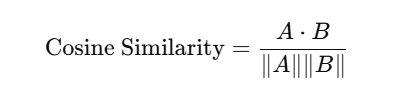


여기서:


A⋅B는 벡터
A와 B의 내적(각 차원 간의 곱을 합한 것)입니다.
||A||와 ||B||는 벡터
A와 B의 크기(즉, 벡터의 길이)입니다.
cosine_similarity 함수는 위 공식을 사용하여, work와 능력단위명칭 벡터들 간의 코사인 유사도를 계산합니다.

코드에서의 유사도 계산 과정
TF-IDF로 변환: TfidfVectorizer를 사용해 work와 능력단위명칭 텍스트를 각각 TF-IDF 벡터로 변환합니다.

tfidf_matrix는 모든 work와 능력단위명칭 텍스트에 대한 TF-IDF 벡터를 포함한 행렬입니다.
work_matrix는 work 텍스트에 대한 TF-IDF 벡터들만 포함하고,
ncs_matrix는 능력단위명칭 텍스트에 대한 TF-IDF 벡터들만 포함합니다.
코사인 유사도 계산: cosine_similarity 함수를 이용해 work_matrix와 ncs_matrix 간의 코사인 유사도를 계산하여 similarity_matrix에 저장합니다.

similarity_matrix[i][j] 값은 i번째 work와 j번째 능력단위명칭 간의 유사도입니다.
이 값이 1에 가까울수록 해당 work와 능력단위명칭이 유사하다고 볼 수 있습니다.
유사도 기반 연관 매칭: 각 work와 모든 능력단위명칭의 유사도 중에서 0이 넘는 모든 항목을 필터링하고, 이를 통해 연관 관계를 매핑합니다.

In [4]:
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1.데이터 불러오기 및 파싱
with open('work24-job.json', 'r', encoding='utf-8') as f:
    job_data = json.load(f)

# job_data는 리스트이므로, 각 항목에서 'work' 및 다른 필드를 추출
work_list = [job['work'] for job in job_data]
job_info_list = [{
    'job_code': job['job_code'],
    'job': job['job'],
    'work': job['work'],
    'related_majors': job['related_majors'],
    'outlook': job['outlook']
} for job in job_data]

# NCS 데이터 불러오기
ncs_data = pd.read_csv('NCS-DATA.CSV', encoding='utf-8')
ncs_list = ncs_data['능력단위명칭'].tolist()

# 2.'work'와 '능력단위명칭' 간 텍스트 유사도 계산
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(work_list + ncs_list)

work_matrix = tfidf_matrix[:len(work_list)]
ncs_matrix = tfidf_matrix[len(work_list):]

# 3.코사인 유사도 계산
similarity_matrix = cosine_similarity(work_matrix, ncs_matrix)

# 4.모든 유사한 항목을 찾고 결과 저장 (유사도 0은 제외)
mapping_results = []
for idx, work_info in enumerate(job_info_list):
    # 해당 work 항목에 대해 유사도가 0.15보다 큰 모든 NCS 항목 필터링
    similar_indices = (similarity_matrix[idx] > 0.15).nonzero()[0]
    for ncs_idx in similar_indices:
        similarity_score = similarity_matrix[idx][ncs_idx]
        best_match_ncs = ncs_list[ncs_idx]
        best_match_ncs_row = ncs_data.iloc[ncs_idx]

        # 결과에 JSON의 필드들과 NCS 데이터 필드들 추가
        mapping_results.append({
            'job_code': work_info['job_code'],
            'job': work_info['job'],
            'work': work_info['work'],
            'related_majors': work_info['related_majors'],
            'outlook': work_info['outlook'],
            'best_match_ncs': best_match_ncs,
            'similarity_score': similarity_score,
            **best_match_ncs_row.to_dict()  # NCS의 다른 열 포함
        })

# 5.결과를 JSON 파일로 저장
with open('work_to_NCS_mapping.json', 'w', encoding='utf-8') as f:
    json.dump(mapping_results, f, ensure_ascii=False, indent=4)
